In [ ]:
from google.colab import files
uploaded = files.upload()

Saving download.jpeg to download.jpeg


Converting Image (BGR to RGB)

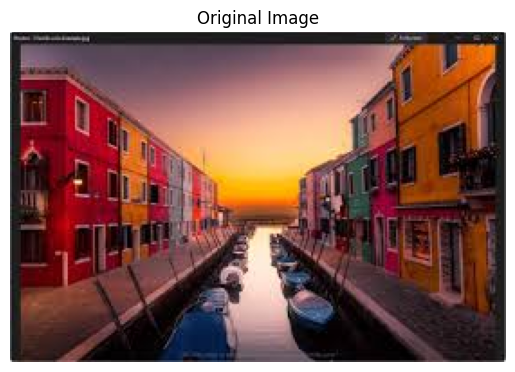

Image saved as output_image.jpg


In [ ]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from skimage.feature import local_binary_pattern
from skimage.measure import label
from skimage import filters, exposure

# read the image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

# convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

cv2.imwrite('output_image.jpg', image)
print("Image saved as output_image.jpg")


Original Image to GrayScale Image

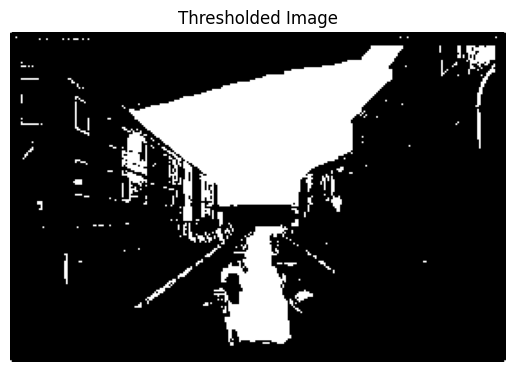

In [ ]:
# converting image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# simple thresholding
_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()


Global & Local Thresholding

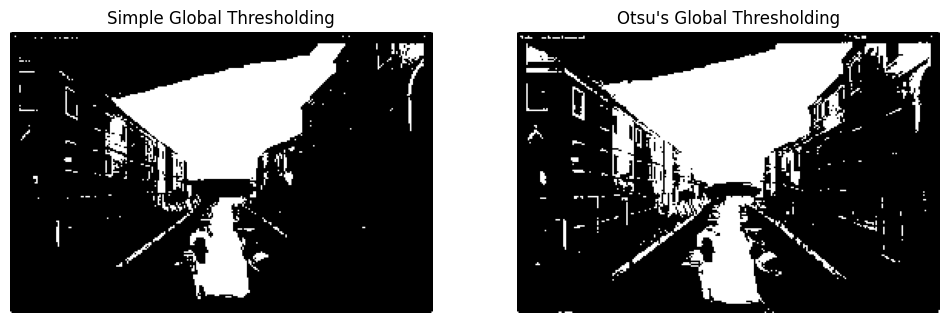

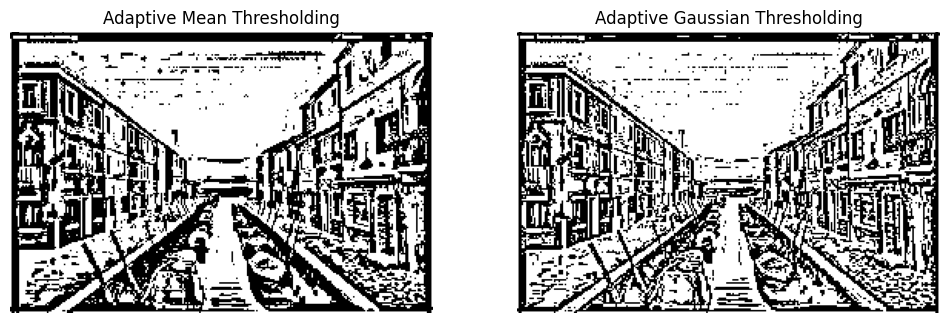

In [ ]:
# Global Thresholding
_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Otsu's thresholding
_, otsu_thresholded_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Simple Global Thresholding')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(otsu_thresholded_image, cmap='gray')
plt.title("Otsu's Global Thresholding")
plt.axis('off')

plt.show()

# Adaptive Mean Thresholding (Local)
adaptive_mean = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Adaptive Gaussian Thresholding
adaptive_gaussian = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(adaptive_mean, cmap='gray')
plt.title('Adaptive Mean Thresholding')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(adaptive_gaussian, cmap='gray')
plt.title('Adaptive Gaussian Thresholding')
plt.axis('off')

plt.show()

Basic Text Features

In [ ]:
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray

# Convert the image to grayscale
image_gray = rgb2gray(image_rgb)
image_gray = (image_gray * 255).astype(np.uint8)

# Compute the GLCM matrix
glcm = graycomatrix(image_gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

# Extract texture features
contrast = graycoprops(glcm, 'contrast')[0, 0]
dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]
correlation = graycoprops(glcm, 'correlation')[0, 0]

# Print the extracted features
print(f'Contrast: {contrast}')
print(f'Dissimilarity: {dissimilarity}')
print(f'Homogeneity: {homogeneity}')
print(f'Energy: {energy}')
print(f'Correlation: {correlation}')

Contrast: 357.4513980295961
Dissimilarity: 10.125563399944163
Homogeneity: 0.30619442266531366
Energy: 0.021791482638735527
Correlation: 0.9457439817820329


More Text Feature

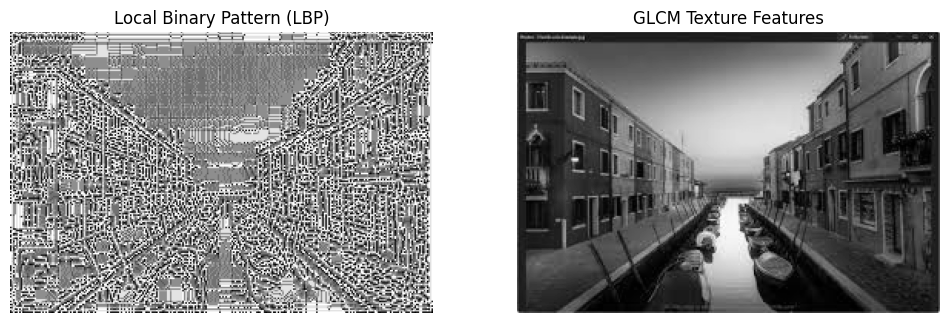

GLCM Texture Features:
Contrast: 359.48488293247186
Dissimilarity: 10.15880898248973
Homogeneity: 0.31314615299934934
Energy: 0.021889026476441906
Correlation: 0.9458451022951481
ASM: 0.0004791294800863748


In [ ]:
# Local Binary Pattern (LBP)
radius = 1
n_points = 8 * radius
lbp = local_binary_pattern(gray_image, n_points, radius, method='uniform')

# Gray Level Co-occurrence Matrix (GLCM)
from skimage.feature import graycomatrix, graycoprops

# compute GLCM
glcm = graycomatrix(gray_image, distances=[1], angles=[0], symmetric=True, normed=True)

# calculating texture features from GLCM
contrast = graycoprops(glcm, 'contrast')[0, 0]
dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]
correlation = graycoprops(glcm, 'correlation')[0, 0]
ASM = graycoprops(glcm, 'ASM')[0, 0]

# display the texture features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(lbp, cmap='gray')
plt.title('Local Binary Pattern (LBP)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('GLCM Texture Features')
plt.axis('off')
plt.show()

print("GLCM Texture Features:")
print(f"Contrast: {contrast}")
print(f"Dissimilarity: {dissimilarity}")
print(f"Homogeneity: {homogeneity}")
print(f"Energy: {energy}")
print(f"Correlation: {correlation}")
print(f"ASM: {ASM}")

Text Extraction

In [ ]:
from google.colab import files
uploaded_new = files.upload()

Saving text-img.png to text-img (1).png


In [ ]:
!pip install pytesseract
import pytesseract

# Read the uploaded image using OpenCV
image_path_new = list(uploaded_new.keys())[0]
image_new = cv2.imread(image_path_new)

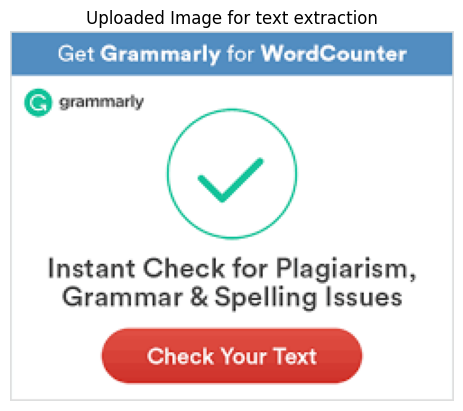

In [ ]:
image_rgb_new = cv2.cvtColor(image_new, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb_new)
plt.title('Uploaded Image for text extraction')
plt.axis('off')
plt.show()

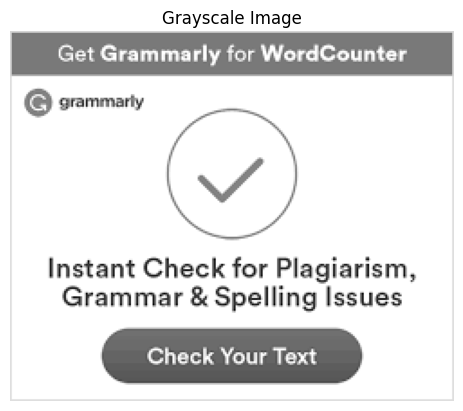

In [ ]:
# Convert to grayscale
gray_image_new = cv2.cvtColor(image_new, cv2.COLOR_BGR2GRAY)

# Display the thresholded image
plt.imshow(gray_image_new, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


In [ ]:
!apt-get install tesseract-ocr
!pip install pytesseract Pillow
from PIL import Image
import io

from google.colab import files

uploaded = files.upload()


# Open the uploaded image
image_path = list(uploaded.keys())[0]  # Get the filename of the uploaded image
image = Image.open(image_path)

# Perform OCR on the image
text = pytesseract.image_to_string(image)

# Print the extracted text
print("Extracted Text:")
print(text)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Saving text-img.png to text-img (2).png
Extracted Text:
Get Grammarly for WordCounter

@ sromeary

Instant Check for Plagiarism,
Grammar & Spelling Issues

Ce Sad

